**Overview of Notebook:**
1. All required imports and data collection
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Testing Various Models
5. Preparing the CSV Submission

In [1]:
# All required import statements 
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import median
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Examine the head of the dataset to get an initial understanding of what the data looks like
training_data = pd.read_csv("../input/titanic/train.csv")
testing_data = pd.read_csv("../input/titanic/test.csv")

training_data.info()
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Exploratory Data Analysis (EDA):**

Now that the data has been collected, some exploratory data analysis is required 

In [3]:
# Get some information of the training dataset 
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Get some information of the testing dataset 
testing_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# Identify the columns of the training data
print("Training Data Information:")
print(training_data.shape)
training_data.describe().columns
print("Testing Data Information:")
print(testing_data.shape)
training_data.describe().columns

Training Data Information:
(891, 12)
Testing Data Information:
(418, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
print(training_data[473:])

     PassengerId  Survived  Pclass  \
473          474         1       2   
474          475         0       3   
475          476         0       1   
476          477         0       2   
477          478         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
473  Jerwan, Mrs. Amin S (Marie Marthe Thuillard)  female  23.0      0      0   
474                   Strandberg, Miss. Ida Sofia  female  22.0      0      0   
475                   Clifford, Mr. George Quincy    male   NaN      0      0   
476                       Renouf, Mr. Peter Henry    male  34.0      1      0   
477                     Braund, Mr. Lewis Richard    male  29.0      1      0   
..                                            ...     ...

In [7]:
print(testing_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

<AxesSubplot:xlabel='Age', ylabel='Count'>

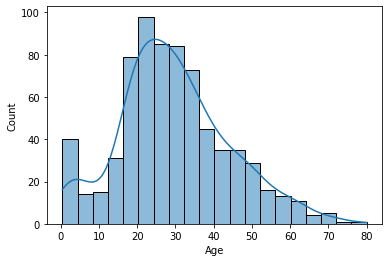

In [8]:
# Seperate the data into numeric and categorical data
numeric_data = training_data[['Age', 'SibSp', 'Parch', 'Fare']]
categorical_data = training_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

sns.histplot(data = training_data['Age'], kde = True)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

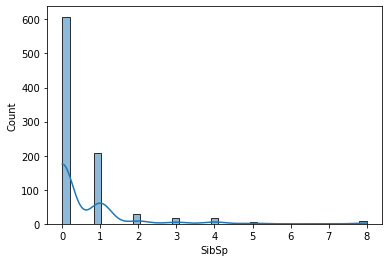

In [9]:
sns.histplot(data = training_data['SibSp'], kde = True)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

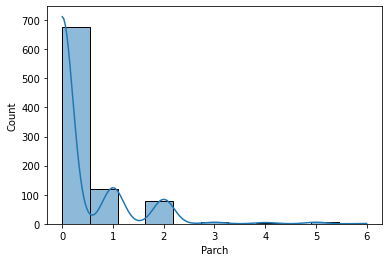

In [10]:
sns.histplot(data = training_data['Parch'], kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

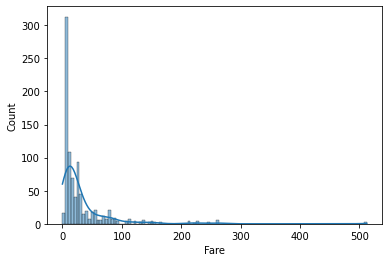

In [11]:
sns.histplot(data = training_data['Fare'], kde = True)

<AxesSubplot:>

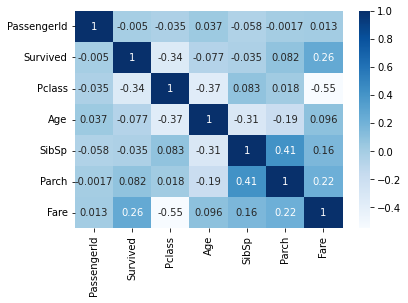

In [12]:
# Plot correlation heatmap to observe what is correlated to survival with basic training data. 
sns.heatmap(training_data.corr(), cmap = "Blues", annot = True)

<AxesSubplot:>

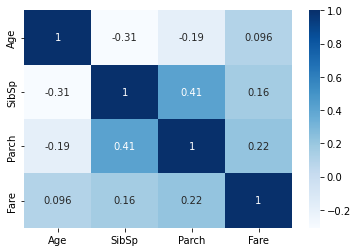

In [13]:
# Plot correlation heatmap to observe what is correlated to survival with basic training data. 
sns.heatmap(numeric_data.corr(), cmap = "Blues", annot = True)

In [14]:
pd.pivot_table(training_data, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


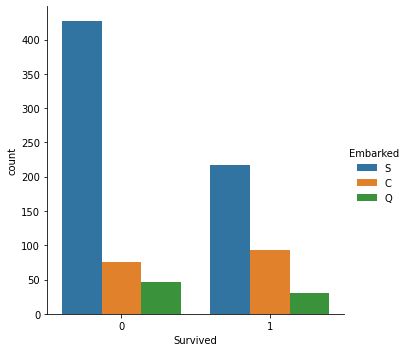

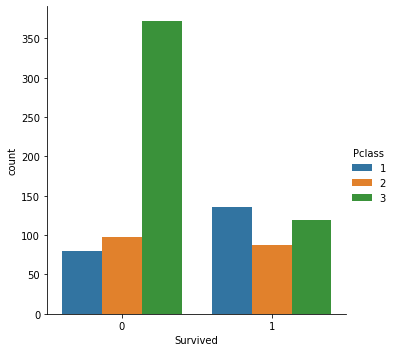

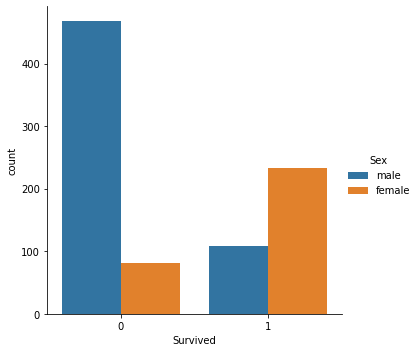

In [15]:
sns.catplot(data = training_data, kind = "count", x = "Survived", hue = "Embarked")
sns.catplot(data = training_data, kind = "count", x = "Survived", hue = "Pclass")
sns.catplot(data = training_data, kind = "count", x = "Survived", hue = "Sex")

In [16]:
total_missing_train = training_data.isnull().sum().sort_values(ascending=False)
print(total_missing_train)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


**Feature Engineering:**

After identifying some missing features, it is clear that feature development is required. That is all completed below. It is sumarized by the following points:

1. All sex data is converted to binary
2. Unkown ages are converted to the median age of all known ages aboard the titanic
3. Cabin Data is collected and converted to numeric format in the CabinData column
4. Ticket data is converted to an integer. If unkown, that integer is set to zero

After these changes are made, additional data visualization is added

In [17]:
# Make sex data binary such that Male = 0, Female = 1

def sex_to_binary(value):
    if isinstance(value, str):
        if value == "male":
            #male_num += 1
            return 0
        else:
            return 1
    return value

training_data["Sex"] = training_data["Sex"].map(sex_to_binary)
testing_data["Sex"] = testing_data["Sex"].map(sex_to_binary)
print(training_data["Sex"])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Count'>

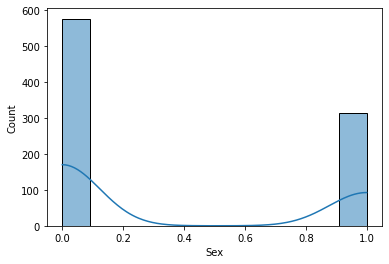

In [18]:
# Replot this data since it has now been corrected 
sns.histplot(data = training_data['Sex'], kde = True)

In [19]:
# Make all unkown ages to median age
training_ages = [a for a in training_data['Age'].tolist() if not math.isnan(a)]
testing_ages = [a for a in training_data['Age'].tolist() if not math.isnan(a)]

median_training_age = np.median(training_ages)
median_testing_age = np.median(testing_ages)

def training_age_to_med_age(age):
    if math.isnan(age):
        return median_training_age
    return age

def testing_age_to_med_age(age):
    if math.isnan(age):
        return median_testing_age
    return age

training_data["Age"] = training_data["Age"].map(training_age_to_med_age)
testing_data["Age"] = testing_data["Age"].map(testing_age_to_med_age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

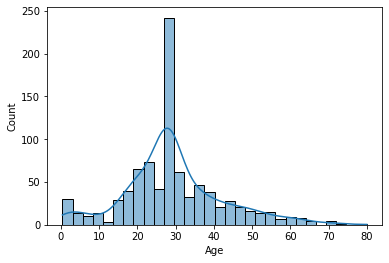

In [20]:
# Replot this training data since it has now been corrected 
sns.histplot(data = training_data['Age'], kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

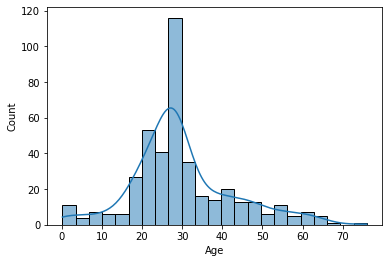

In [21]:
# Replot this testing data since it has now been corrected 
sns.histplot(data = testing_data['Age'], kde = True)

In [22]:
# Simplify cabin data
training_data['CabinData'] = training_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training_data['CabinData'].value_counts()

testing_data['CabinData'] = testing_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
testing_data['CabinData'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: CabinData, dtype: int64

In [23]:
pd.pivot_table(training_data, index = 'Survived', columns = 'CabinData', values = 'Ticket', aggfunc = 'count')

CabinData,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [24]:
# Cabin Categories 
# Convered all Cabin Letter Codes to Rooms to ints 

def char_to_int(c):
    if isinstance(c, int):
        return c
    if not isinstance(c, str):
        if math.isnan(c):
            c = '0'
    c = str(c)[0]
    return ord(c)

training_data['Embarked'] = training_data['Embarked'].map(char_to_int)
testing_data['Embarked'] = testing_data['Embarked'].map(char_to_int)

print(training_data.Embarked.value_counts())
pd.pivot_table(training_data, index='Survived', columns='Embarked', values = 'Ticket', aggfunc='count')

83    644
67    168
81     77
48      2
Name: Embarked, dtype: int64


Embarked,48,67,81,83
Survived,,,,
0,NaN,75.0,47.0,427.0
1,2.0,93.0,30.0,217.0


In [25]:
# Cabin Categories 
# Convered all Cabin Letter Codes to Rooms to ints 
def char_to_int(c):
    if not isinstance(c, str):
        if math.isnan(c):
            c = '0'
    return ord(c)

training_data['CabinLetter'] = training_data.Cabin.apply(lambda x: str(x)[0])
training_data['CabinLetter'] = training_data['CabinLetter'].map(char_to_int)

testing_data['CabinLetter'] = testing_data.Cabin.apply(lambda x: str(x)[0])
testing_data['CabinLetter'] = testing_data['CabinLetter'].map(char_to_int)

print(training_data.CabinLetter.value_counts())
pd.pivot_table(training_data, index='Survived', columns='CabinLetter', values = 'Ticket', aggfunc='count')

110    687
67      59
66      47
68      33
69      32
65      15
70      13
71       4
84       1
Name: CabinLetter, dtype: int64


CabinLetter,65,66,67,68,69,70,71,84,110
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [26]:
# Set all ticket numbers to integers
def ticket_to_num(ticket):
    if isinstance(ticket, int):
        return ticket
    if isinstance(ticket, str):
        try:
            if len(ticket.split(" ")) > 1:
                return int(ticket.split(" ")[-1])
            else:
                return int(ticket)
        except:
            return 0
    return 0
            
training_data['Ticket'] = training_data['Ticket'].map(ticket_to_num)
testing_data['Ticket'] = testing_data['Ticket'].map(ticket_to_num)
print(training_data['Ticket'])
pd.pivot_table(training_data, index='Survived', columns='Ticket', aggfunc='count')

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: int64


Age                                                          \
Ticket   0       3       541     693     695     751     752     851       
Survived                                                                   
0            3.0     2.0     NaN     1.0     1.0     1.0     NaN     1.0   
1            1.0     NaN     1.0     NaN     NaN     1.0     1.0     NaN   

                          ...   SibSp                                          \
Ticket   1166    1585     ... 3101296 3101298 3101305 3101306 3101307 3101310   
Survived                  ...                                                   
0            1.0     1.0  ...     1.0     NaN     1.0     1.0     1.0     1.0   
1            NaN     NaN  ...     NaN     1.0     NaN     NaN     NaN     NaN   

                                          
Ticket   3101311 3101312 3101316 3101317  
Survived                                  
0            1.0     1.0     1.0     1.0  
1            NaN     NaN     NaN     NaN  

[2 rows x 8148 columns]

<AxesSubplot:>

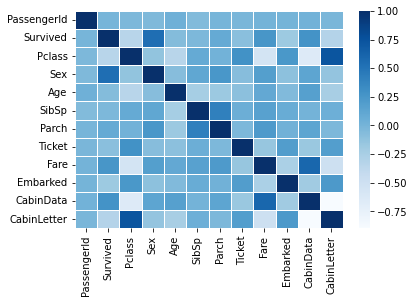

In [27]:
# Plot correlation heatmap to observe what is correlated to survival with basic training data. 
sns.heatmap(training_data.corr(), cmap = "Blues", linewidths=0.5)

In [28]:
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 
            'Ticket', 'CabinLetter', 'Embarked', 'CabinData']
X = training_data[features]
Y = training_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.53, train_size=0.47)
X_test = X_test[0:418]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418, 10), (418, 10), (418,), (473,))

**Testing Various Models:**
1. Random Forrest Classifier 
2. Gradient Boost Model
3. Perceptron

In [29]:
# Random Forest 

rf_predictions = []
rf_n_estimators = []
for i in range(500,503):
    random_forest_model = RandomForestClassifier(n_estimators=i)
    random_forest_model.fit(X_train, y_train)
    rf_prediction = random_forest_model.predict(X_test)
    rf_predictions.append(random_forest_model.score(X_train, y_train))
    rf_n_estimators.append(i)

print("Max Prediction: " + str(max(rf_predictions)) + " with " 
      + str(rf_n_estimators[rf_predictions.index(max(rf_predictions))]) + " predictors")
print("Min Prediction: " + str(min(rf_predictions)) + " with " 
      + str(rf_n_estimators[rf_predictions.index(min(rf_predictions))]) + " predictors") 
print("Median Prediction: " + str(statistics.median(rf_predictions)) + " with " 
      + str(rf_n_estimators[rf_predictions.index(statistics.median(rf_predictions))]) + " predictors") 
print("Mean Prediction: " + str(statistics.mean(rf_predictions))) 
print("Standard Deviation of Predictions is: " + str(statistics.stdev(rf_predictions)))

Max Prediction: 0.9976076555023924 with 500 predictors
Min Prediction: 0.9976076555023924 with 500 predictors
Median Prediction: 0.9976076555023924 with 500 predictors
Mean Prediction: 0.9976076555023924
Standard Deviation of Predictions is: 0.0


In [30]:
# Gradient Boost Model
gb_predictions = []
gb_n_estimators = []
for i in range(500,503):
    gradient_boost_model = GradientBoostingClassifier(n_estimators = i)
    gradient_boost_model.fit(X_train, y_train)
    gb_prediction = gradient_boost_model.predict(X_test)
    gb_predictions.append(gradient_boost_model.score(X_train, y_train))
    gb_n_estimators.append(i)

print("Max Prediction: " + str(max(gb_predictions)) + " with " 
      + str(gb_n_estimators[gb_predictions.index(max(gb_predictions))]) + " predictors")
print("Min Prediction: " + str(min(gb_predictions)) + " with " 
      + str(gb_n_estimators[gb_predictions.index(min(gb_predictions))]) + " predictors") 
print("Median Prediction: " + str(statistics.median(gb_predictions)) + " with " 
      + str(gb_n_estimators[gb_predictions.index(statistics.median(gb_predictions))]) + " predictors") 
print("Mean Prediction: " + str(statistics.mean(gb_predictions))) 
print("Standard Deviation of Predictions is: " + str(statistics.stdev(gb_predictions)))

Max Prediction: 0.9976076555023924 with 500 predictors
Min Prediction: 0.9976076555023924 with 500 predictors
Median Prediction: 0.9976076555023924 with 500 predictors
Mean Prediction: 0.9976076555023924
Standard Deviation of Predictions is: 0.0


In [31]:
# Perceptron
p_predictions = []
p_n_estimators = []
for i in range(500,503):
    perceptron_model = Perceptron(max_iter=i)
    perceptron_model.fit(X_train, y_train)
    p_prediction = perceptron_model.predict(X_test)
    p_predictions.append(perceptron_model.score(X_train, y_train))
    p_n_estimators.append(i)
print(len(p_prediction))
print("Max Prediction: " + str(max(p_predictions)) + " with " 
      + str(p_n_estimators[p_predictions.index(max(p_predictions))]) + " predictors")
print("Min Prediction: " + str(min(p_predictions)) + " with " 
      + str(p_n_estimators[p_predictions.index(min(p_predictions))]) + " predictors") 
print("Median Prediction: " + str(statistics.median(p_predictions)) + " with " 
      + str(p_n_estimators[p_predictions.index(statistics.median(p_predictions))]) + " predictors") 
print("Mean Prediction: " + str(statistics.mean(p_predictions))) 
print("Standard Deviation of Predictions is: " + str(statistics.stdev(p_predictions)))

418
Max Prediction: 0.39712918660287083 with 500 predictors
Min Prediction: 0.39712918660287083 with 500 predictors
Median Prediction: 0.39712918660287083 with 500 predictors
Mean Prediction: 0.39712918660287083
Standard Deviation of Predictions is: 0.0


Cross Validation for each model used is included below:

In [32]:
# Cross Validation method is used to further evaluate the scores of the models 
perceptron_model = Perceptron()
perceptron_scores = cross_val_score(perceptron_model, X_train, y_train, cv=10, scoring = "accuracy")
random_forest_model = RandomForestClassifier()
random_forest_scores = cross_val_score(random_forest_model, X_train, y_train, cv=10, scoring = "accuracy")
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_scores = cross_val_score(gradient_boost_model, X_train, y_train, cv=10, scoring = "accuracy")
cross_validation_means = {}
print("==============================")
print("Perceptron Cross Validation")
print("Scores:", perceptron_scores)
cross_validation_means["p_mean"] = perceptron_scores.mean()
print("Mean:", perceptron_scores.mean())
print("Standard Deviation:", perceptron_scores.std())
print("==============================")
print("Random Forest Cross Validation")
print("Scores:", random_forest_scores)
cross_validation_means["rf_mean"] = random_forest_scores.mean()
print("Mean:", random_forest_scores.mean())
print("Standard Deviation:", random_forest_scores.std())
print("==============================")
print("Gradient Boost Cross Validation")
print("Scores:", gradient_boost_scores)
cross_validation_means["gb_mean"] = gradient_boost_scores.mean()
print("Mean:", gradient_boost_scores.mean())
print("Standard Deviation:", gradient_boost_scores.std())
print("Cross Validation Means: ")
print(cross_validation_means)

Perceptron Cross Validation
Scores: [0.61904762 0.38095238 0.61904762 0.4047619  0.4047619  0.5952381
 0.57142857 0.5952381  0.6097561  0.6097561 ]
Mean: 0.540998838559814
Standard Deviation: 0.09549030371114199
Random Forest Cross Validation
Scores: [0.80952381 0.80952381 0.73809524 0.80952381 0.78571429 0.78571429
 0.88095238 0.80952381 0.85365854 0.87804878]
Mean: 0.81602787456446
Standard Deviation: 0.04190272740360702
Gradient Boost Cross Validation
Scores: [0.78571429 0.80952381 0.73809524 0.83333333 0.78571429 0.78571429
 0.83333333 0.80952381 0.75609756 0.85365854]
Mean: 0.7990708478513356
Standard Deviation: 0.034126385724213386
Cross Validation Means: 
{'p_mean': 0.540998838559814, 'rf_mean': 0.81602787456446, 'gb_mean': 0.7990708478513356}


**Submission:**
Preparing the submission csv with the best performing predictor 

In [33]:
# Randfom Forest has the best score. In the event that anything changes, 
# this code selects the best prediction based on the mean cross validation score
max_mean_cross_validation_score = max(cross_validation_means, key = cross_validation_means.get)
predictions = {"rf": rf_prediction, "gb": gb_prediction, "p": p_prediction}
prediction_names = {"rf": "Random Forest", "gb": "Gradient Boost", "p": "Perceptron"}
best_prediction_prefix = max_mean_cross_validation_score.split("_")[0]
best_prediction = predictions[best_prediction_prefix]
print(prediction_names[best_prediction_prefix] + " is the best prediction")

print("Testing_Data Length: " + str(len(testing_data["PassengerId"])))
print("Best Prediction: " + str(len(best_prediction)))
submission = pd.DataFrame({
#         "PassengerId": training_data["PassengerId"].head(len(best_prediction)),
#         "Survived": best_prediction
        "PassengerId": testing_data["PassengerId"],
        "Survived": best_prediction
    })

submission.to_csv('submission.csv', index=False)

Random Forest is the best prediction
Testing_Data Length: 418
Best Prediction: 418


In [34]:
data = pd.read_csv("submission.csv")
data.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
